In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import cv2
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input

In [2]:
base_dir = "D:\\Alzheimer_s Dataset"

In [3]:
train = ImageDataGenerator(rescale=1./255)
test =  ImageDataGenerator(rescale=1./255)
val =  ImageDataGenerator(rescale=1./255)

In [6]:
train=base_dir+ '/test'

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='training',
    seed=1000 )

Found 1279 files belonging to 4 classes.
Using 1024 files for training.


In [4]:
val=base_dir+ '/train'

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='validation',
    seed=1000
    )

Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [7]:
test=base_dir +'/test'

test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224,224),
    batch_size=32,
    seed=1000
    )

Found 1279 files belonging to 4 classes.


In [8]:
class_names = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']

In [9]:
train_data.class_names = class_names
val_data.class_names = class_names

In [10]:
print(val_data)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


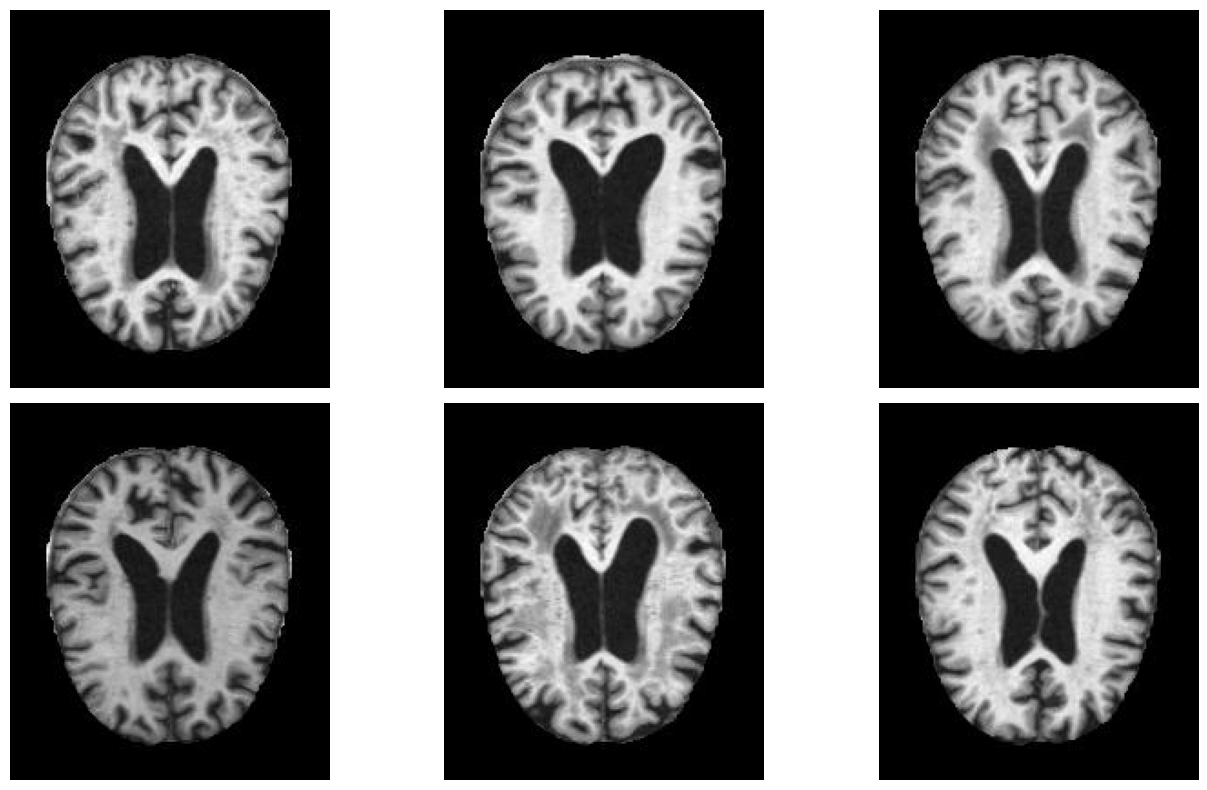

In [12]:
def visualize(direction):
    list_dir=os.listdir(direction)
    plt.figure(figsize=(14,8))
    for i in range(1,7):
        plt.subplot(2,3,i)
        img= plt.imread(os.path.join(direction,list_dir[i]))
        plt.imshow(img,cmap='gray')
        plt.axis('off')
    plt.tight_layout()

MildDemented_dir= 'C:\\Users\\srinithi\\Downloads\\cnn_sequential\\PROJECT\\Alzheimer_s Dataset\\test\MildDemented'
visualize(MildDemented_dir)

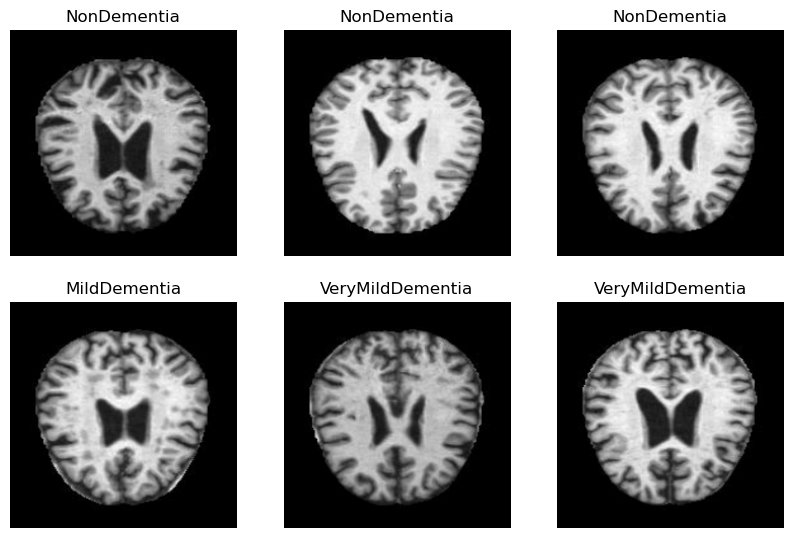

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")
plt.savefig("sample.png")

In [14]:
model=Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [15]:
model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [16]:
history = model.fit(train_data, validation_data=val_data, epochs=85)

Epoch 1/85
32/32 [==============================] - 35s 1s/step - loss: 8.1370 - accuracy: 0.2920 - val_loss: 1.1604 - val_accuracy: 0.3477
Epoch 2/85
32/32 [==============================] - 43s 1s/step - loss: 1.9007 - accuracy: 0.2793 - val_loss: 1.3064 - val_accuracy: 0.3477
Epoch 3/85
32/32 [==============================] - 36s 1s/step - loss: 1.4879 - accuracy: 0.3164 - val_loss: 1.2723 - val_accuracy: 0.3574
Epoch 4/85
32/32 [==============================] - 64s 2s/step - loss: 1.3541 - accuracy: 0.3496 - val_loss: 1.2444 - val_accuracy: 0.5088
Epoch 5/85
32/32 [==============================] - 68s 2s/step - loss: 1.3522 - accuracy: 0.3281 - val_loss: 1.2721 - val_accuracy: 0.4717
Epoch 6/85
32/32 [==============================] - 49s 2s/step - loss: 1.3165 - accuracy: 0.3818 - val_loss: 1.2522 - val_accuracy: 0.4385
Epoch 7/85
32/32 [==============================] - 77s 2s/step - loss: 1.2648 - accuracy: 0.3896 - val_loss: 1.2385 - val_accuracy: 0.3838
Epoch 8/85
32/32 [==

In [17]:
model.evaluate(test_data)

40/40 [==============================] - 19s 393ms/step - loss: 0.6604 - accuracy: 0.7733


[0.6603977084159851, 0.7732603549957275]

In [18]:
model.save("model.h5")

c:\Users\srinithi\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


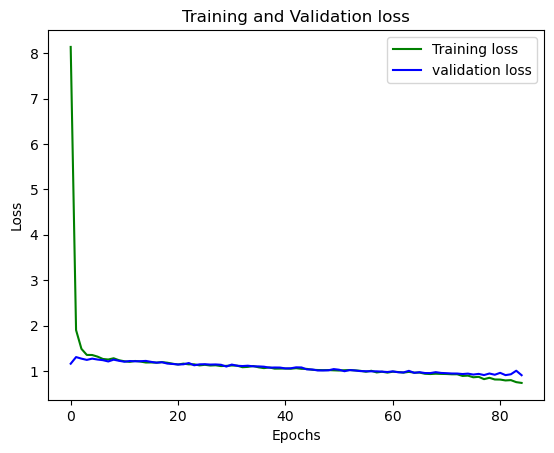

In [19]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("train_vs_val_loss.png")
plt.show()

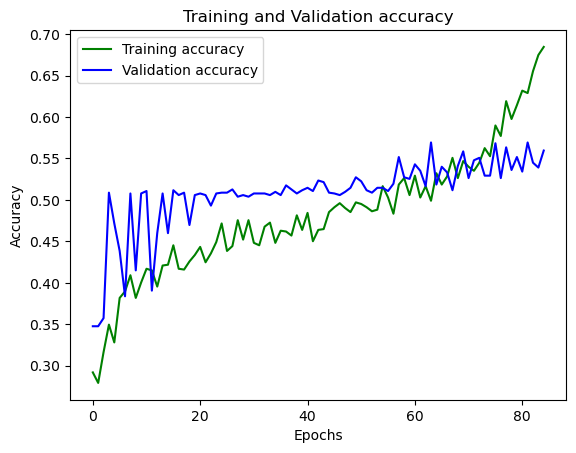

In [20]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("train_vs_val_acc.png")
plt.show()

In [21]:
CLASSES = {0: "Mild Dementia", 1: "Moderate Dementia", 2: "Non Dementia", 3: "Very Mild Dementia"}

1/1 [==============================] - 0s 56ms/step


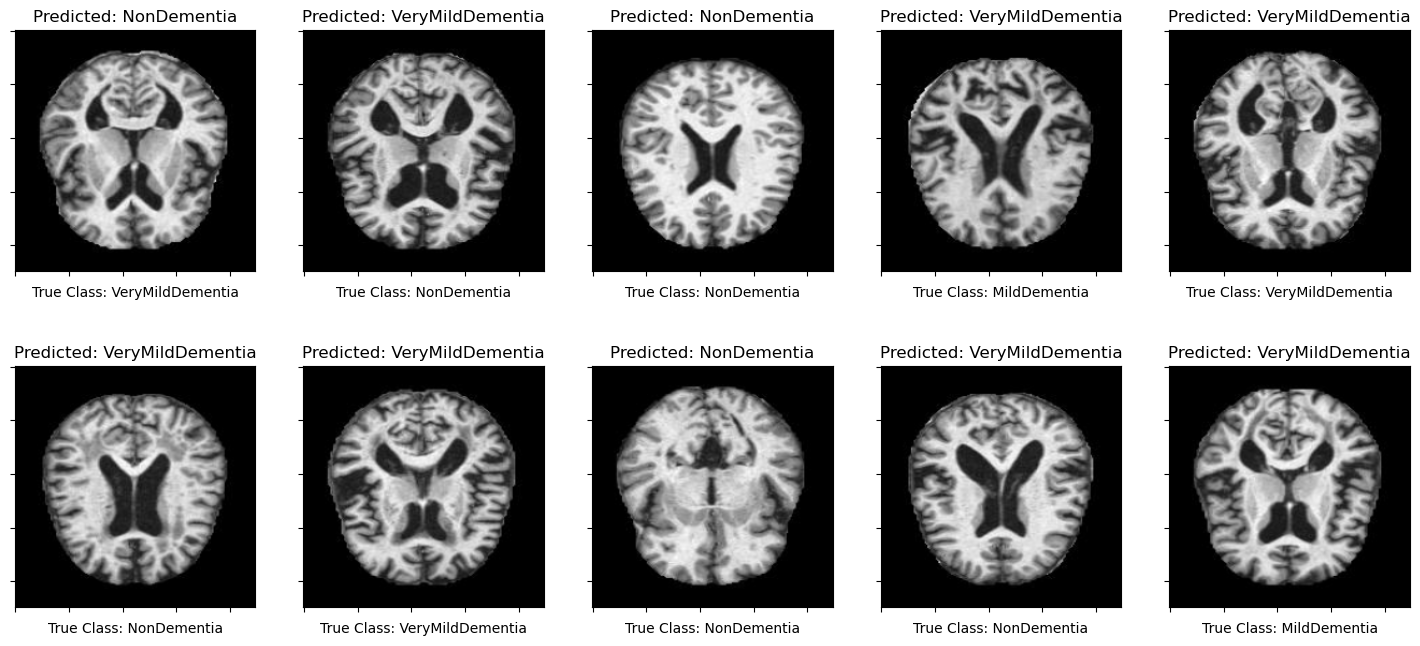

In [22]:
plt.figure(figsize=(18,8))
for images, labels in val_data.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i]/255)
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))
        plt.title("Predicted: {}".format(class_names[p]))
        plt.xlabel("True Class: {}".format(val_data.class_names[labels[i]]))

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


val_predictions = []
val_true_labels = []
for images, labels in val_data:
    predictions = loaded_model.predict(images)
    val_predictions.extend(np.argmax(predictions, axis=1))
    val_true_labels.extend(labels.numpy())

conf_matrix = confusion_matrix(val_true_labels, val_predictions)
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("confusion_matrix.png")
plt.show()

class_report = classification_report(val_true_labels, val_predictions, target_names=class_names)
print("Classification Report:")
print(class_report)


precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

for i, class_name in enumerate(class_names):
    print(f"{class_name}: Precision={precision[i]}, Recall={recall[i]}, F1 Score={f1_score[i]}")

metrics_names = ["Precision", "Recall", "F1 Score"]
metrics_values = [precision, recall, f1_score]

plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.bar(class_names, metrics_values[i], color='skyblue')
    plt.title(f"{metrics_names[i]} for each class")
    plt.xlabel("Class")
    plt.ylabel(metrics_names[i])
plt.savefig("metrics_bar_plots.png")
plt.show()


NameError: name 'loaded_model' is not defined

In [24]:
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1 score from the confusion matrix
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(8, 6))
plt.plot(class_names, precision, marker='o', label='Precision', color='green')
plt.title('Precision for Each Class')
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.savefig("precision_line_plot.png")
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(class_names, recall, marker='o', label='Recall', color='blue')
plt.title('Recall for Each Class')
plt.xlabel('Class')
plt.ylabel('Recall Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.savefig("recall_line_plot.png")
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(class_names, f1_score, marker='o', label='F1 Score', color='orange')
plt.title('F1 Score for Each Class')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.savefig("f1_score_line_plot.png")
plt.show()


NameError: name 'conf_matrix' is not defined

1/1 [==============================] - 0s 299ms/step


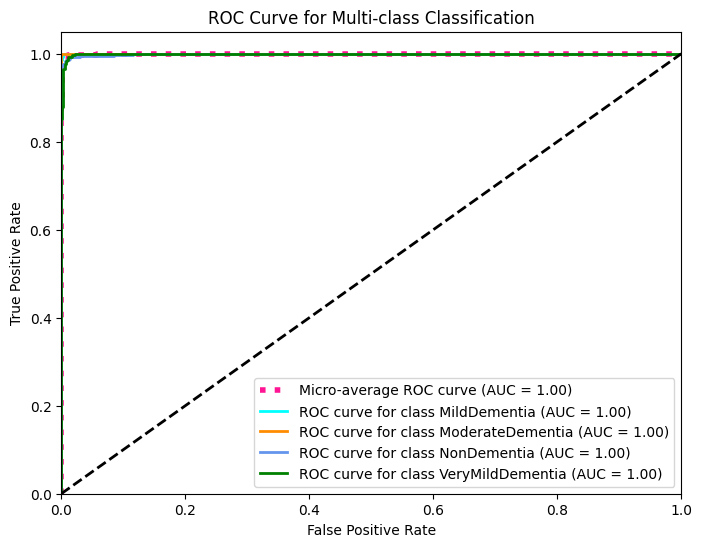

In [93]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

loaded_model = tf.keras.models.load_model('/content/model.h5')

val_predictions = []
val_true_labels = []
for images, labels in val_data:
    predictions = loaded_model.predict(images)
    val_predictions.extend(predictions)
    val_true_labels.extend(labels.numpy())

val_predictions = np.array(val_predictions)
val_true_labels = np.array(val_true_labels)

val_true_labels_bin = label_binarize(val_true_labels, classes=[0, 1, 2, 3])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(val_true_labels_bin[:, i], val_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(val_true_labels_bin.ravel(), val_predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:0.2f})', color='deeppink', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_names[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend(loc="lower right")
plt.savefig("roc_curve.png")
plt.show()

In [65]:
import tensorflow as tf
import numpy as np
import os

#CLASSES = {0: "Mild Dementia", 1: "Moderate Dementia", 2: "Non Dementia", 3: "Very Mild Dementia"}

pretrained_model = tf.keras.models.load_model("/content/model.h5")

img_path = '/content/drive/MyDrive/Alzheimer_s Dataset/test/NonDemented/26 (67).jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)

preds = pretrained_model.predict(x)
pred_class = CLASSES[np.argmax(preds)]

print(f"Predicted class: {pred_class}")


1/1 [==============================] - 0s 266ms/step
Predicted class: Non Dementia
